In [3]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import random
import math

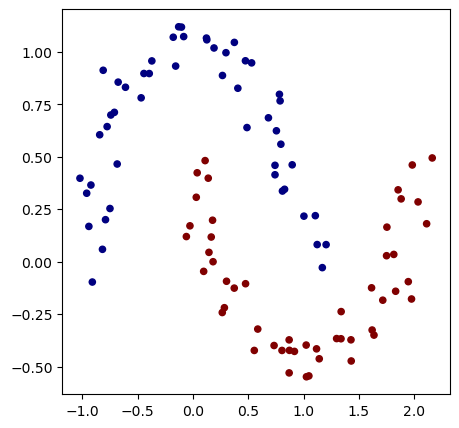

In [13]:
np.random.seed(1337)
random.seed(1337)

# make up a dataset
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [14]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [21]:
model = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

In [77]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.025, weight_decay=1e-4)

In [78]:
model.train()

for i in range(200):
    preds = model(X_tensor).squeeze()
    loss = loss_fn(preds, y_tensor)

    loss.backward()
    optimizer.step()
    model.zero_grad()

    accuracy = [(yi > 0) == (predsi > 0) for yi, predsi in zip(y_tensor, preds)]

    if i%10 == 0:
        print(f"Step {i+1}: Loss: {loss:>6f} Accuracy: {sum(accuracy)/len(accuracy)}")

Step 1: Loss: 0.101760 Accuracy: 0.9900000095367432
Step 11: Loss: 0.098312 Accuracy: 0.9900000095367432
Step 21: Loss: 0.095064 Accuracy: 0.9900000095367432
Step 31: Loss: 0.092047 Accuracy: 0.9900000095367432
Step 41: Loss: 0.089226 Accuracy: 0.9900000095367432
Step 51: Loss: 0.086577 Accuracy: 0.9900000095367432
Step 61: Loss: 0.084085 Accuracy: 0.9900000095367432
Step 71: Loss: 0.081750 Accuracy: 0.9900000095367432
Step 81: Loss: 0.079558 Accuracy: 0.9900000095367432
Step 91: Loss: 0.077512 Accuracy: 1.0
Step 101: Loss: 0.075587 Accuracy: 1.0
Step 111: Loss: 0.073783 Accuracy: 1.0
Step 121: Loss: 0.072075 Accuracy: 1.0
Step 131: Loss: 0.070457 Accuracy: 1.0
Step 141: Loss: 0.068948 Accuracy: 1.0
Step 151: Loss: 0.067459 Accuracy: 1.0
Step 161: Loss: 0.066022 Accuracy: 1.0
Step 171: Loss: 0.064644 Accuracy: 1.0
Step 181: Loss: 0.063301 Accuracy: 1.0
Step 191: Loss: 0.062020 Accuracy: 1.0


(-1.548639298268643, 1.951360701731357)

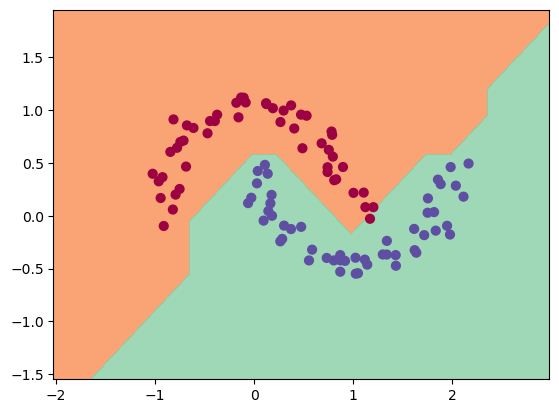

In [79]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
# inputs = [list(map(torch.tensor, xrow)) for xrow in Xmesh]
# scores = list(map(model, inputs))
inputs = [torch.tensor(xrow, dtype=torch.float32) for xrow in Xmesh]
scores = [model(x.unsqueeze(0)) for x in inputs]
Z = np.array([s > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# plt.show()